# MNIST CLASSIFICATION

---
# Import the environment

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import fetch_mldata #MNIST
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler #Scaling
from sklearn import decomposition #PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

---
# PART I. Frame the Problem


### Data

In this project, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.


### Project

We have to explore the data and tackle the problem using machine learning. 

We will build a model that can predict the number represented by an image.

---
# PART II. Get the data

### II. 1) Import the data

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
data = mnist['data']
label = mnist['target']

### II. 2) Sample a training and test sets

We are dividing our initial dataset into two new sets: a training and a test datasets.

We are getting insights of the data and training our model with the training dataset, and only evaluating the final performance of the model with the test dataset (avoiding data snooping).

The training dataset corresponds to ~80% of the initial dataset, and the test dataset to the remaining ~20%.

In [4]:
shuffle_index = np.random.permutation(70000)
train_index = shuffle_index[:56000]
test_index = shuffle_index[56001:]
X_train, y_train = data[train_index], label[train_index]
print('Training shape: ', X_train.shape)
X_test, y_test = data[test_index], label[test_index]
print('Test shape: ', X_test.shape)

Training shape:  (56000, 784)
Test shape:  (13999, 784)


---
# PART III - Visualization

In this part, we visualize some data. 

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

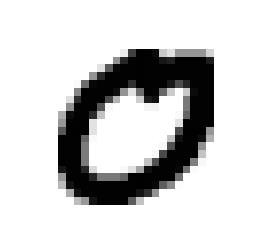

In [5]:
some_digit = X_train[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
plt.axis("off")
plt.show()

And that’s what the label tells us:

In [6]:
y_train[36000]

0.0

---
# PART IV. Prepare the Data

In this part, we are looking at the dimensionality reduction of the dataset. We are also scaling the data. 

### IV. 1) PCA

We have 784 features. In order to make our prediction model more accurrate and avoid overfitting, we will process Principal Component Analysis to have less features.

In [7]:
def PCA_function(df):
    """
    Inputs: 
         - A dataframe df
    """
    pca = decomposition.PCA()
    
    #Fit the model
    pca.fit(df)
    
    #Get the list of variances
    list_variance = pca.explained_variance_ratio_
    
    #Get the number of components
    n_components = len(pca.components_)
    
    #Plot with Elbow Method
    plt.figure(figsize = (10,6))
    ax = plt.gca()
    plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
    plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
    plt.plot(range(0, n_components+1),[0.95 for i in range(0, n_components+1)],'--',c = 'black',
         linewidth = 1,label="95% of the variance")
    plt.legend()
    plt.xlabel('Components number',fontsize = 12)
    plt.ylabel('Proportion of variance captured',fontsize = 12)
    plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.grid(True)
    plt.show()
    
    print("The first five PC capture {:.2f}%".format(100*(np.cumsum([0] + list(list_variance))[5])),"of the variance")

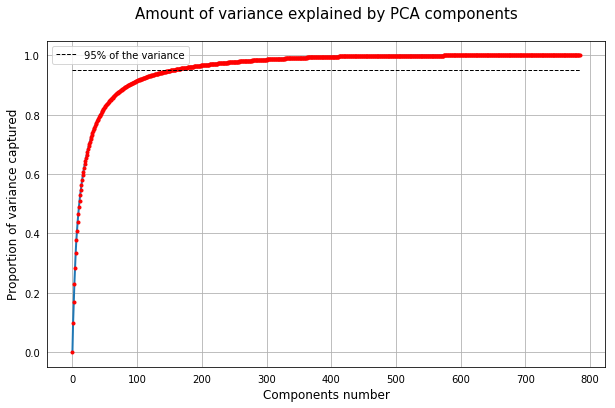

The first five PC capture 33.38% of the variance


In [8]:
PCA_function(X_train)

We can see that with 160 features instead of 784, we can explain 95% of the variance.

In [9]:
pca = decomposition.PCA(n_components=160)
#Fit the model
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [10]:
print('Training shape: ', X_train.shape)
print('Test shape: ', X_test.shape)

Training shape:  (56000, 160)
Test shape:  (13999, 160)


### IV. 2) Feature Scaling

We use the standardization to scale the data.

In [11]:
scaler = StandardScaler()
# We normalize the matrix
scaler.fit(X_train)

def scaling(df):
    df = scaler.transform(df)
    return df

In [12]:
X_train = scaling(X_train)
X_test = scaling(X_test)

---
# PART V. Fit Different Models

In this part, we will fit several models and try to get the best performance. 

### V. 1) Stochastic Gradient Descent (SGD)

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [14]:
sgd_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([X_train[36000]])

array([0.])

In [16]:
y_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/s

In [17]:
f1_score(y_train, y_pred_sgd, average="macro")

0.9002557347410918

### V. 2) Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
forest_clf.predict([X_train[36000]])

array([0.])

In [22]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [23]:
f1_score(y_train, y_pred_forest, average="macro")

0.8715817552894312

### V. 3) K Neighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [25]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
knn_clf.predict([X_train[36000]])

array([0.])

In [27]:
y_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [28]:
f1_score(y_train, y_pred_knn, average="macro")

0.8856216445035117

### V. 4) Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gd_clf = GradientBoostingClassifier()

In [31]:
gd_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [32]:
gd_clf.predict([X_train[36000]])

array([0.])

In [33]:
y_pred_gd = cross_val_predict(gd_clf, X_train, y_train, cv=3)

In [34]:
f1_score(y_train, y_pred_gd, average="macro")

0.9191092962727806

### V. 5) Support Vector Machine (SVM)

In [37]:
from sklearn import svm
svm_clf = svm.SVC()

In [39]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svm_clf.predict([X_train[36000]])

array([0.])

In [41]:
y_pred_svm = cross_val_predict(svm_clf, X_train, y_train, cv=3)

In [42]:
f1_score(y_train, y_pred_svm, average="macro")

0.9701715751311666

### V. 6) Adaboost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()

In [44]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [45]:
ada_clf.predict([X_train[36000]])

array([0.])

In [46]:
y_pred_ada = cross_val_predict(ada_clf, X_train, y_train, cv=3)

In [47]:
f1_score(y_train, y_pred_ada, average="macro")

0.6891273800563265

### V. 7) Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

In [49]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=100, bootstrap=True, n_jobs=-1,
            oob_score=True
        )
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [50]:
bag_clf.predict([X_train[36000]])

array([0.])

In [51]:
y_pred_bag = bag_clf.predict(X_train)

In [52]:
f1_score(y_train, y_pred_bag, average="macro")

0.7444955737427073

### V. 8) Hard Voting Classifier

In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
named_estimators = [
    ("sgd_clf", sgd_clf),
    ("gradient_boosting_clf", gd_clf),
    ("svm_clf", svm_clf),
]

In [75]:
voting_clf = VotingClassifier(
            estimators=named_estimators,
            voting='hard'
        )
voting_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


VotingClassifier(estimators=[('sgd_clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [76]:
voting_clf.predict([X_train[36000]])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0.])

In [77]:
y_pred_voting = cross_val_predict(voting_clf, X_train, y_train, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset,

In [78]:
f1_score(y_train, y_pred_voting, average="macro")

0.9479880512185208